In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import math
from pprint import pprint
import random

In [2]:
np.random.seed(42)

dry_bean = pd.read_csv("Dry_Bean.csv")
onehot_encoded_df = pd.get_dummies(dry_bean)

In [3]:
pca_model = PCA(n_components=2)
pca_model.fit(onehot_encoded_df)

df_2d = pd.DataFrame(pca_model.transform(onehot_encoded_df))

In [14]:
def gen_random_hex_colors(count):
    results = []
    for i in range(count):
        color = random.randrange(0, 2**24)
        hex_color = hex(color)
        std_color = "#" + hex_color[2:]
        results.append(std_color)
    return results 
print(gen_random_hex_colors(3))

['#f276c9', '#5c545e', '#2ace92']


In [21]:
def kmeans(df, k):
    epsilon = 0.001
    # df must be 2d with these columns : 0, 1
    def calc_distance(point1, point2):
        return math.sqrt(
            (point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2
        )

    def find_nearest_centroid(centroids, point):
        distances = [calc_distance(point, centroid) for centroid in centroids]
        if len(find_duplicates(distances)) != 0:
            raise RuntimeError("Couldnt assign a centroid to a point : two centroids have the same distance with this point")
        index_of_min = distances.index(min(distances))
        return centroids[index_of_min]
    def find_mean_of_points(points):
        return [
            np.mean([point[0] for point in points]),
            np.mean([point[1] for point in points]),
        ]

    def find_duplicates(array): # [1,2,2,4] -> [2]
        results = []
        for index, i in enumerate(array):
            for index2, i2 in enumerate(array):
                if i2 == i and index != index2:
                    if not i in results:
                        results.append(i)
        return results

    x_values = df[0]
    y_values = df[1]
    points = [[x_values[i], y_values[i]] for i in range(len(x_values))]

    centroids = random.sample(points , k )
    while True :
        labeled_points = [
            {
                "point": point,
                "nearest_centroid": find_nearest_centroid(centroids, point),
            }
            for point in points
        ]
       
       
        prev_centroids = centroids.copy()

        centroids = []
        for centroid in prev_centroids:
            points_of_centroid = []
            for labeled_point in labeled_points:
                if labeled_point["nearest_centroid"] == centroid:
                    points_of_centroid.append(labeled_point["point"])
            centroids.append(find_mean_of_points(points_of_centroid + [centroid]))

        
        #if distance is equal to 0 then its obvious its smaller than esplison too 
        #so there is no need to check 
        bools = []
        for i in range(len(centroids)):
            if calc_distance(prev_centroids[i],centroids[i]) < epsilon:
                bools.append(True)
            else:
                bools.append(False)
        if all(bools) :
            count = 0 
            for centroid in prev_centroids:
                cluster = [item['point']  for item in labeled_points if item['nearest_centroid'] == centroid]
                count += len(cluster)
                plt.scatter([point[0] for point in cluster ] ,[point[1] for point in cluster ] ,color =gen_random_hex_colors(1)[0] )
            plt.scatter(
                list(map(lambda centroid: centroid[0], prev_centroids)),
                list(map(lambda centroid: centroid[1], prev_centroids)),
                color="black",
            )
            break
    plt.show()


13611
13611


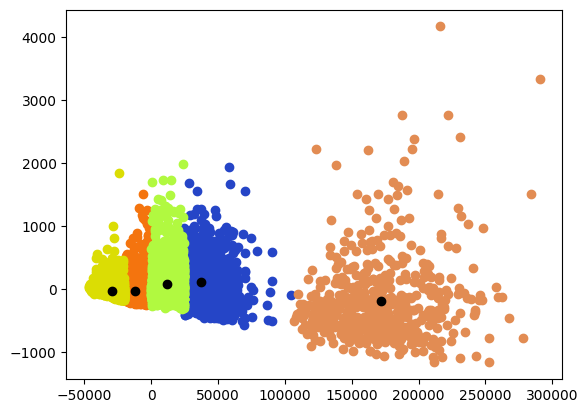

In [22]:
kmeans(df_2d, 5)